<a href="https://colab.research.google.com/github/abanis24/creditcardfraud_detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import accuracy_score,confusion_matrix, precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from  sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('creditcard_2023.csv')

In [3]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [4]:
df.shape

(27571, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27571 entries, 0 to 27570
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      27571 non-null  int64  
 1   V1      27571 non-null  float64
 2   V2      27571 non-null  float64
 3   V3      27571 non-null  float64
 4   V4      27571 non-null  float64
 5   V5      27571 non-null  float64
 6   V6      27571 non-null  float64
 7   V7      27571 non-null  float64
 8   V8      27571 non-null  float64
 9   V9      27571 non-null  float64
 10  V10     27570 non-null  float64
 11  V11     27570 non-null  float64
 12  V12     27570 non-null  float64
 13  V13     27570 non-null  float64
 14  V14     27570 non-null  float64
 15  V15     27570 non-null  float64
 16  V16     27570 non-null  float64
 17  V17     27570 non-null  float64
 18  V18     27570 non-null  float64
 19  V19     27570 non-null  float64
 20  V20     27570 non-null  float64
 21  V21     27570 non-null  float64
 22

In [7]:
data = df.copy()

In [16]:
data.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
data.isnull().sum()


,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [19]:
for col in data.columns:
  if data[col].isnull().sum()>0:
    data[col] = data[col].fillna(data[col].value_counts().idxmax(),inplace=True)
  else:
    data[col]=data[col]

In [20]:
data.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [26]:
X = data.drop(['id','Class'],axis=1)
Y = data['Class']
X.shape

(27571, 29)

In [27]:
Y.shape

(27571,)

In [33]:
df[df['Class']==0].shape

(27480, 31)

In [34]:
df[df['Class']==1].shape

(90, 31)

In [37]:
from collections import Counter
print('Original dataset shape %s' % Counter(Y))


Original dataset shape Counter({0.0: 27481, 1.0: 90})


<Axes: xlabel='Class'>

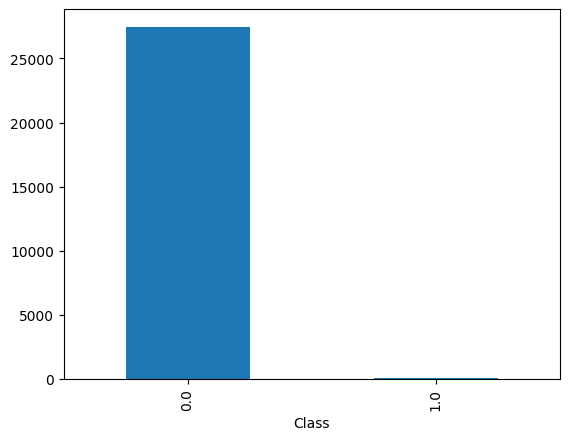

In [22]:
df['Class'].value_counts().plot(kind = 'bar')

It's is pretty clear that we have imbalance dataset so we need to handle this imbalance using SMOTE which is a combination of over sampling and under sampling. Let's do that.

In [35]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
smt.fit_resample(X,Y)
X_res, y_res = smt.fit_resample(X, Y)

In [38]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0.0: 27442, 1.0: 27442})


In [40]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42)